In [ ]:
"""
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
"""

In [99]:


from sklearn import datasets, svm, metrics

import matplotlib.image as mpimg


import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import pandas as pd
import random


%matplotlib inline  


def show_image(img):
    plt.subplot(1, 1, 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    

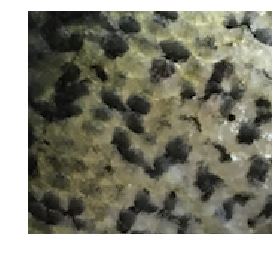

In [123]:
# load image
img = mpimg.imread('img/cp.png')
img = img[:,:,:3] # remove alpha transparency value

# show original image
show_image(img)

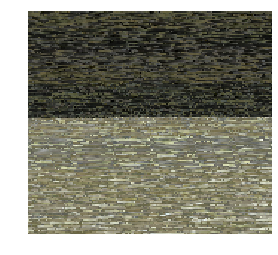

In [127]:
# transform image to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
img2d = np.reshape(img, (w * h, d))

# kmean 
n_colors = 2
kmeans = KMeans(n_clusters=n_colors)
kmeans.fit(img2d)

values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

df_img2d_w_cluster = pd.DataFrame(img2d, columns=("r", "g", "b"))
df_img2d_w_cluster['cluster'] = labels


img2dk_w_cluster_sorted = df_img2d_w_cluster.sort_values(by=['cluster'])[['r', 'g', 'b']].values
show_image(img2dk_w_cluster_sorted.reshape((w, h, d)))


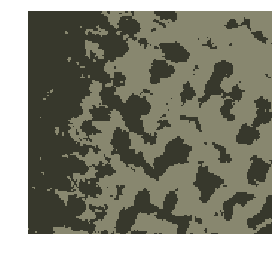

In [129]:
# find the average rgb each cluster
dfg = df_img2d_w_cluster.groupby("cluster") \
.agg({ 'cluster':'size', 'r':'mean', 'g':'mean', 'b':'mean'}) \
.rename(columns={'cluster':'count', 'r':'r', 'g':'g', 'b':'b'}) \
.reset_index()

cluster2rgb = dfg.T.to_dict()


# convert colour
df_img2d_w_cluster_change = df_img2d_w_cluster.ix[:]

for i in range(0, n_colors):
    df_img2d_w_cluster_change.r[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['r']
    df_img2d_w_cluster_change.g[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['g']
    df_img2d_w_cluster_change.b[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['b']

img2d_w_cluster_change = df_img2d_w_cluster_change.values[:,:3]

# show blurred picture
show_image(img2d_w_cluster_change.reshape((w, h, d)))



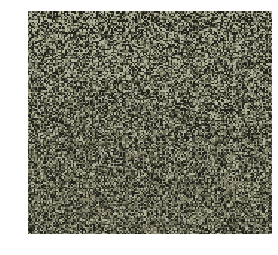

In [116]:
# shuffle 
random.shuffle(img2d)

show_image(img2d.reshape((w, h, d)))

done in 0.287s.
Predicting color indices on the full image (k-means)
done in 0.020s.
Predicting color indices on the full image (random)
done in 0.015s.


In [119]:
img.shape

(151, 164, 3)

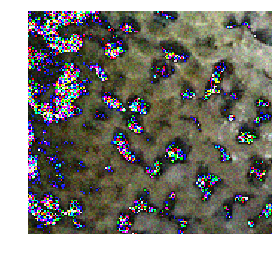

In [126]:
img2 = img - np.random.rand(151,164,3)/5

show_image(img2)

164